In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file_1 = ROOT.TFile.Open("run2C_305stop.root")
hist_1 = ROOT.TH1D()
hcov_1 = ROOT.TH2D()
hist_1 = file_1.Get("calo_histogram_sum_ratio")
hcov_1 = file_1.Get("hcov")
file_2 = ROOT.TFile.Open("run2D_305stop.root")
hist_2 = ROOT.TH1D()
hcov_2 = ROOT.TH2D()
hist_2 = file_2.Get("calo_histogram_sum_ratio")
hcov_2 = file_2.Get("hcov")
file_3 = ROOT.TFile.Open("run2E_305stop.root")
hist_3 = ROOT.TH1D()
hcov_3 = ROOT.TH2D()
hist_3 = file_3.Get("calo_histogram_sum_ratio")
hcov_3 = file_3.Get("hcov")
file_4 = ROOT.TFile.Open("run2F_305stop.root")
hist_4 = ROOT.TH1D()
hcov_4 = ROOT.TH2D()
hist_4 = file_4.Get("calo_histogram_sum_ratio")
hcov_4 = file_4.Get("hcov")
file_5 = ROOT.TFile.Open("run2G_305stop.root")
hist_5 = ROOT.TH1D()
hcov_5 = ROOT.TH2D()
hist_5 = file_5.Get("calo_histogram_sum_ratio")
hcov_5 = file_5.Get("hcov")
file_6 = ROOT.TFile.Open("run2H_305stop.root")
hist_6 = ROOT.TH1D()
hcov_6 = ROOT.TH2D()
hist_6 = file_6.Get("calo_histogram_sum_ratio")
hcov_6 = file_6.Get("hcov")

In [3]:
fit_start=30000
fit_stop=305000
fit_range=hist_1.FindBin(fit_stop)-hist_1.FindBin(fit_start)+1
y_val=np.empty(shape=(6,fit_range))
y_err=np.empty(shape=(6,fit_range))
x_val=np.empty(shape=(6,fit_range))
y_cov=np.empty(shape=(6,fit_range,fit_range))  

In [4]:
%%time
for ibin in range (0,fit_range):
    y_val[0][ibin]=hist_1.GetBinContent(ibin+hist_1.FindBin(fit_start))
    y_err[0][ibin]=hist_1.GetBinError(ibin+hist_1.FindBin(fit_start))
    x_val[0][ibin]=hist_1.GetBinCenter(ibin+hist_1.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[0][irow][icol]=hcov_1.GetBinContent(irow+hist_1.FindBin(fit_start),icol+hist_1.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[1][ibin]=hist_2.GetBinContent(ibin+hist_2.FindBin(fit_start))
    y_err[1][ibin]=hist_2.GetBinError(ibin+hist_2.FindBin(fit_start))
    x_val[1][ibin]=hist_2.GetBinCenter(ibin+hist_2.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[1][irow][icol]=hcov_2.GetBinContent(irow+hist_2.FindBin(fit_start),icol+hist_2.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[2][ibin]=hist_3.GetBinContent(ibin+hist_3.FindBin(fit_start))
    y_err[2][ibin]=hist_3.GetBinError(ibin+hist_3.FindBin(fit_start))
    x_val[2][ibin]=hist_3.GetBinCenter(ibin+hist_3.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[2][irow][icol]=hcov_3.GetBinContent(irow+hist_3.FindBin(fit_start),icol+hist_3.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[3][ibin]=hist_4.GetBinContent(ibin+hist_4.FindBin(fit_start))
    y_err[3][ibin]=hist_4.GetBinError(ibin+hist_4.FindBin(fit_start))
    x_val[3][ibin]=hist_4.GetBinCenter(ibin+hist_4.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[3][irow][icol]=hcov_4.GetBinContent(irow+hist_4.FindBin(fit_start),icol+hist_4.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[4][ibin]=hist_5.GetBinContent(ibin+hist_5.FindBin(fit_start))
    y_err[4][ibin]=hist_5.GetBinError(ibin+hist_5.FindBin(fit_start))
    x_val[4][ibin]=hist_5.GetBinCenter(ibin+hist_5.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[4][irow][icol]=hcov_5.GetBinContent(irow+hist_5.FindBin(fit_start),icol+hist_5.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[5][ibin]=hist_6.GetBinContent(ibin+hist_6.FindBin(fit_start))
    y_err[5][ibin]=hist_6.GetBinError(ibin+hist_6.FindBin(fit_start))
    x_val[5][ibin]=hist_6.GetBinCenter(ibin+hist_6.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[5][irow][icol]=hcov_6.GetBinContent(irow+hist_6.FindBin(fit_start),icol+hist_6.FindBin(fit_start))


CPU times: user 38.4 s, sys: 8.05 s, total: 46.5 s
Wall time: 46.4 s


In [5]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [6]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist_2.GetBinWidth(1))
T_a=2*nbinshift*hist_2.GetBinWidth(1)

asym=np.empty(6)
dasym=np.empty(6)
rval=np.empty(6)
drval=np.empty(6)
phi=np.empty(6)
dphi=np.empty(6)
A_cbo=np.empty(6)
dA_cbo=np.empty(6)
tau_cbo=np.empty(6)
dtau_cbo=np.empty(6)
omega_cbo=np.empty(6)
domega_cbo=np.empty(6)
phi_cbo=np.empty(6)
dphi_cbo=np.empty(6)
A_cbo_A=np.empty(6)
dA_cbo_A=np.empty(6)
phi_cbo_A=np.empty(6)
dphi_cbo_A=np.empty(6)
A_cbo_phi=np.empty(6)
dA_cbo_phi=np.empty(6)
phi_cbo_phi=np.empty(6)
dphi_cbo_phi=np.empty(6)
A_vw=np.empty(6)
dA_vw=np.empty(6)
tau_vw=np.empty(6)
dtau_vw=np.empty(6)
omega_vw=np.empty(6)
domega_vw=np.empty(6)
phi_vw=np.empty(6)
dphi_vw=np.empty(6)
A_y=np.empty(6)
dA_y=np.empty(6)
tau_y=np.empty(6)
dtau_y=np.empty(6)
omega_y=np.empty(6)
domega_y=np.empty(6)
phi_y=np.empty(6)
dphi_y=np.empty(6)
A_2cbo=np.empty(6)
dA_2cbo=np.empty(6)
tau_2cbo=np.empty(6)
dtau_2cbo=np.empty(6)
omega_2cbo=np.empty(6)
domega_2cbo=np.empty(6)
phi_2cbo=np.empty(6)
dphi_2cbo=np.empty(6)
calonum=np.empty(6)
red_chi2=np.empty(6)
fwave=np.empty(shape=(6,fit_range))
res=np.empty(shape=(6,fit_range))
fou=np.empty(shape=(6,fit_range))
xfft=np.empty(shape=(6,fit_range))

In [7]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [8]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [9]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [10]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [11]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 175275
    omega_vw = 0.01393

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [12]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 175275
    omega_vw = 0.01393
    
    tau_vbo = 28137
    omega_vbo = 0.014037

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [13]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [15]:
fit_range

1835

In [16]:
%%time
for icalo in range(0,6): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.02,
             240000,
             0.0023404,
             2.00]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.02,
              1.1,
              0.003,
              1.2]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])
    
    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.001,
              5.1]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])

    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              0.0005,
              3.5]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])

    p_init23=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              0.001,
              4.2]
    
    pars23, cov23 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo])

    p_init_final=pars23
    
    pars2, cov_final = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func23(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func23(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    
    res[icalo] = (y_val[icalo] - fit_func23(x_val[icalo], *pars2))/y_err[icalo]
    fou[icalo]=abs(np.fft.fft(res[icalo]))
    xfft[icalo]= np.linspace(0,6.667,num=fit_range) 
    
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]
        
    


CPU times: user 39 s, sys: 9.65 s, total: 48.7 s
Wall time: 27.3 s


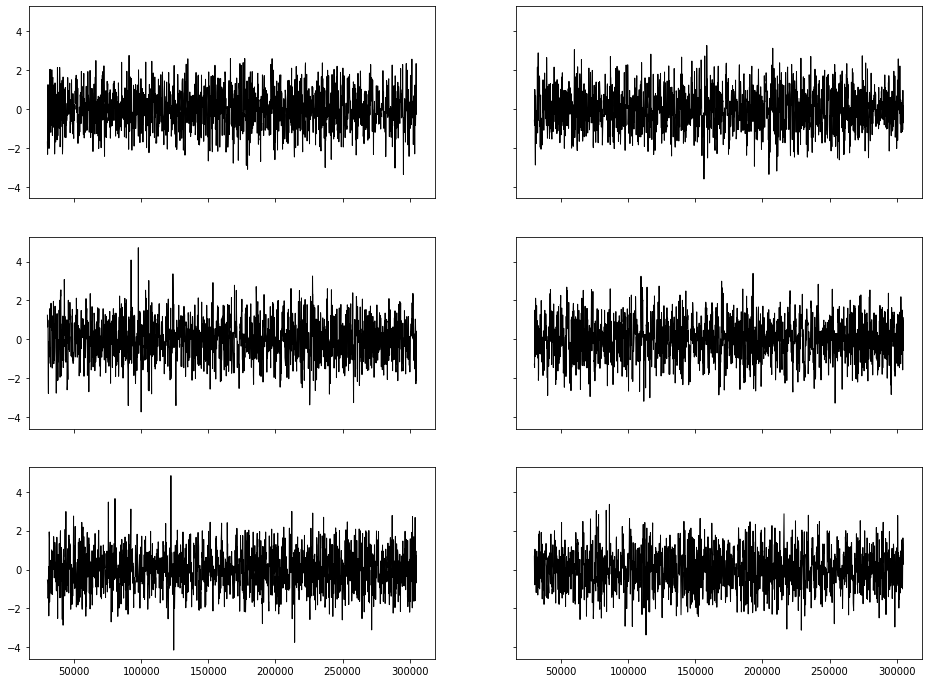

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,figsize=(16,12))
for n in range(3):  #row index
    for p in range(2):  # column index
        axes[n,p].plot(x_val[2*n+p], res[2*n+p], linestyle='solid', linewidth=1, color='black')
        #axes[n,p].set_xlim(left=2.1, right=2.4)

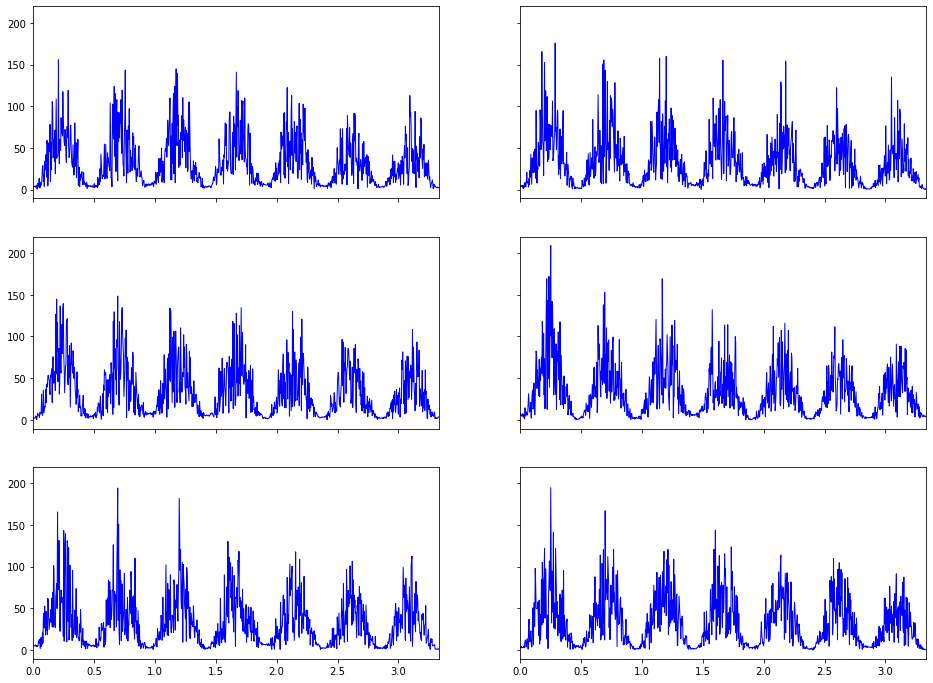

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,figsize=(16,12))
for n in range(3):  #row index
    for p in range(2):  # column index
        axes[n,p].plot(xfft[2*n+p], fou[2*n+p], linestyle='solid', linewidth=1, color='blue')
        axes[n,p].set_xlim(left=0, right=6.667/2)

In [19]:
(0.5*2*np.pi*nbinshift)/6.667

6.597014721802475

In [20]:
def fit_Fwave(x: np.double,
              amp: np.double = 0.0)-> np.double:
    
    Fomega=(0.5*2*np.pi*nbinshift)/6.667
    
    return amp*sin(Fomega*x)*sin(Fomega*x)

p_0=[150]

for i in range(0,6):
    fwave_p, fwave_cov = opt.curve_fit(f=fit_Fwave, xdata=xfft[i], ydata=fou[i], p0=p_0)
    fwave[i]=fwave_p

<function matplotlib.pyplot.show(close=None, block=None)>

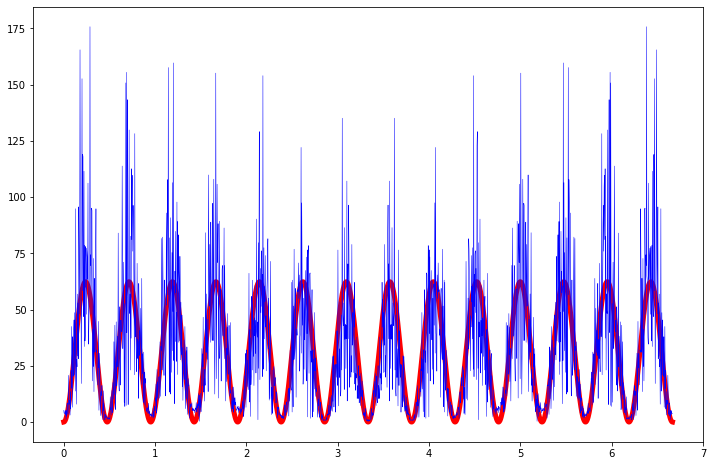

In [21]:
plt.figure(figsize=(12,8))
plt.plot(xfft[0], fit_Fwave(xfft[1], fwave[1]), linestyle='solid', linewidth=5, color='red')
plt.plot(xfft[1], fou[1], linestyle='solid', linewidth=0.5, color='blue')
plt.show

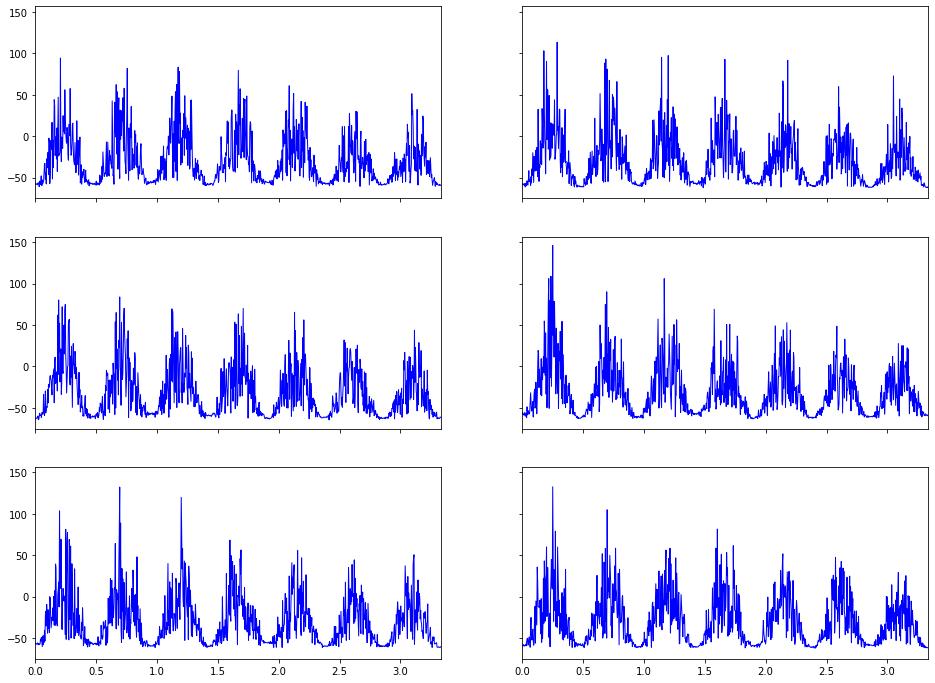

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,figsize=(16,12))
for n in range(3):  #row index
    for p in range(2):  # column index
        axes[n,p].plot(xfft[2*n+p], fou[2*n+p]-fwave[2*n+p], linestyle='solid', linewidth=1, color='blue')
        axes[n,p].set_xlim(left=0, right=6.667/2)

In [23]:
rval

array([-45.58071492, -44.4575339 , -44.00329916, -44.16271694,
       -43.3626071 , -39.31429086])

In [24]:
drval

array([0.79599154, 0.86716693, 1.40847024, 1.29401924, 2.70177718,
       2.26345513])

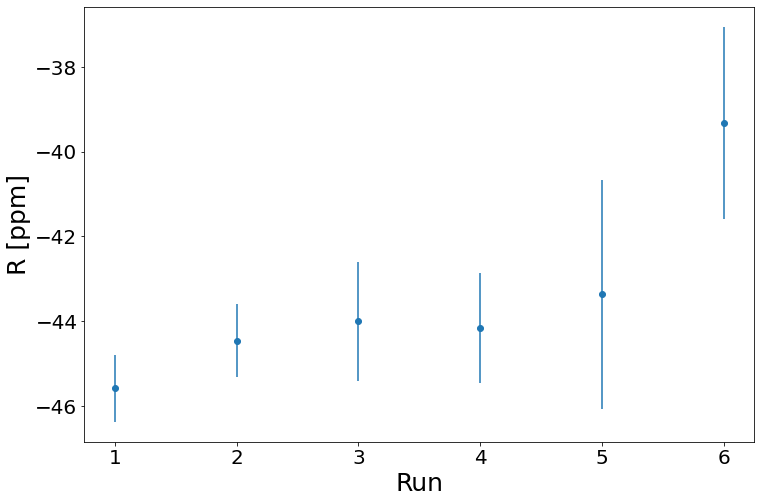

In [25]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run2_caloscan_R.jpg')

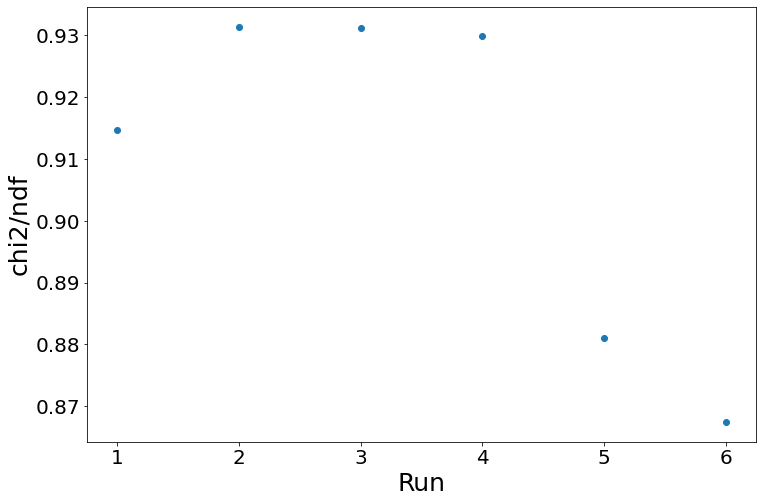

In [26]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, red_chi2, yerr=0, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()

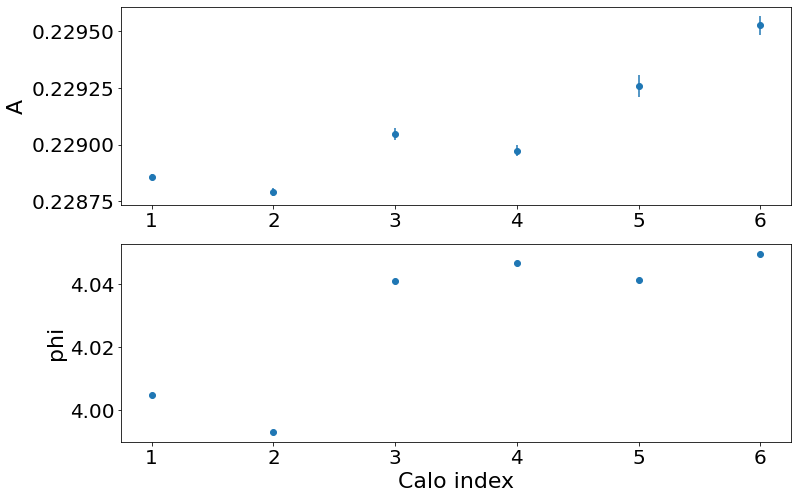

In [27]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=22)
 
# second line
plt.subplot(212)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, phi, yerr=dphi, fmt="o")
plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=22)

plt.show()

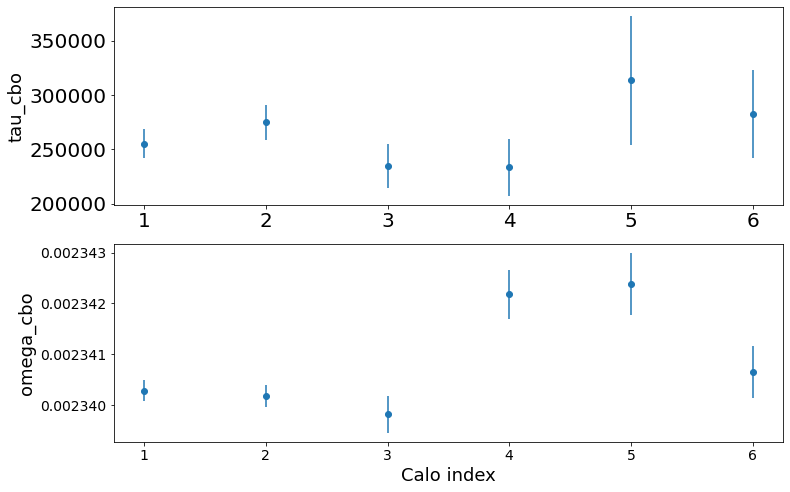

In [28]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel('tau_cbo',fontsize=18)
 
# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, omega_cbo, yerr=domega_cbo, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('omega_cbo',fontsize=18)

plt.show()

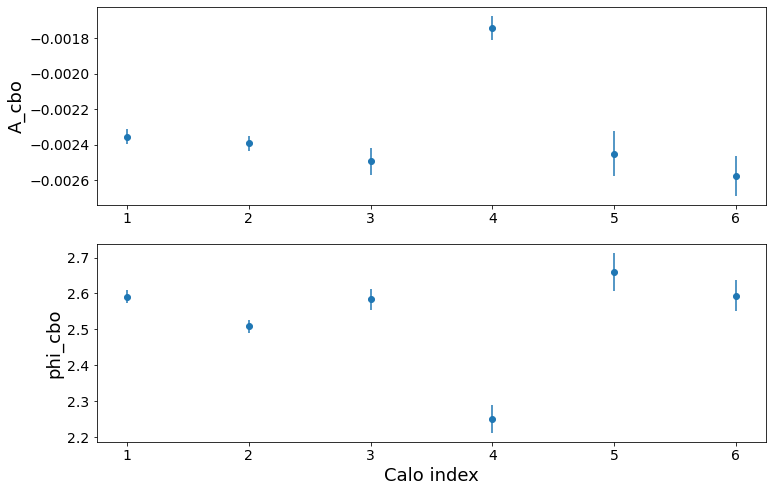

In [29]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, A_cbo, yerr=dA_cbo, fmt="o")
plt.ylabel('A_cbo',fontsize=18)

for icalo in range(0,6):
    if phi_cbo[icalo]>6.28:
        phi_cbo[icalo]=phi_cbo[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_cbo, yerr=dphi_cbo, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_cbo',fontsize=18)

plt.show()

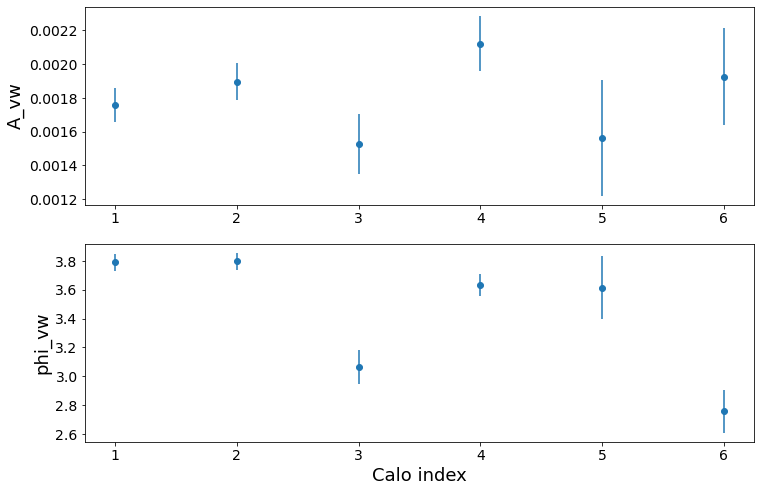

In [30]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, np.abs(A_vw), yerr=dA_vw, fmt="o")
plt.ylabel('A_vw',fontsize=18)

for icalo in range(0,6):
    if phi_vw[icalo]>6.28:
        phi_vw[icalo]=phi_vw[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_vw, yerr=dphi_vw, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_vw',fontsize=18)

plt.show()

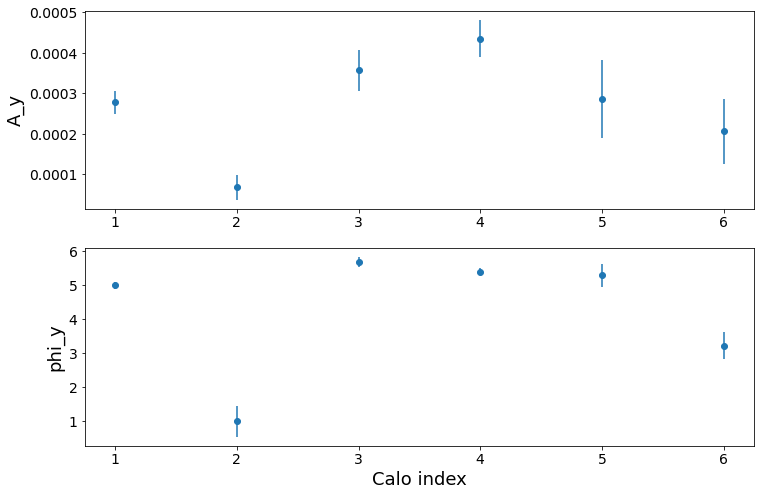

In [31]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, np.abs(A_y), yerr=dA_y, fmt="o")
plt.ylabel('A_y',fontsize=18)

for icalo in range(0,6):
    if phi_y[icalo]>6.28:
        phi_y[icalo]=phi_y[icalo]-6.28

# second line
plt.subplot(212)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.errorbar(calonum, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_y',fontsize=18)

plt.show()